# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 10:
- Player Attributes and Demographics: Performing descriptive analysis using various data analysis and visualization techniques
- Solving business questions related to K-means clustering.
- Contract Management: Performing descriptive analysis using various data analysis and visualization techniques.
- Writing interpretation for each analysis individually.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


# A) Player Attributes and Demographics: Descriptive Analysis
## What is the average height, market value, and age of players grouped by their preferred foot?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure necessary columns are present and clean data
data['age'] = pd.to_datetime('today').year - pd.to_datetime(data['date_of_birth']).dt.year
summary = data.groupby('foot').agg({
    'height_in_cm': 'mean',
    'market_value_in_eur': 'mean',
    'age': 'mean'
}).reset_index()

# Display results
print(summary)

    foot  height_in_cm  market_value_in_eur        age
0   both    184.484163         9.567873e+05  37.506787
1   left    188.416514         1.098624e+06  34.796330
2  right    183.006687         5.004848e+06  32.855967


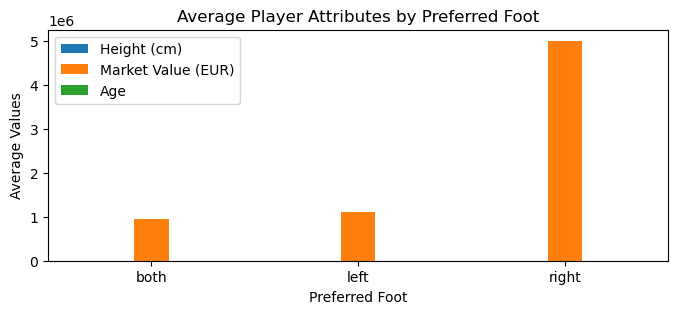

In [5]:
summary.set_index('foot').plot(kind='bar', figsize=(8, 3))
plt.title("Average Player Attributes by Preferred Foot")
plt.ylabel("Average Values")
plt.xlabel("Preferred Foot")
plt.legend(["Height (cm)", "Market Value (EUR)", "Age"])
plt.xticks(rotation=0)
plt.show()

### Interpretation:
- This analysis reveals the average physical and financial characteristics of players based on their preferred foot, helping scouts and analysts evaluate player profiles.

# K-Means Clustering
## Can we cluster players based on their physical attributes and market value to identify patterns?

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Select relevant features and scale them
features = data[['height_in_cm', 'market_value_in_eur', 'age']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)

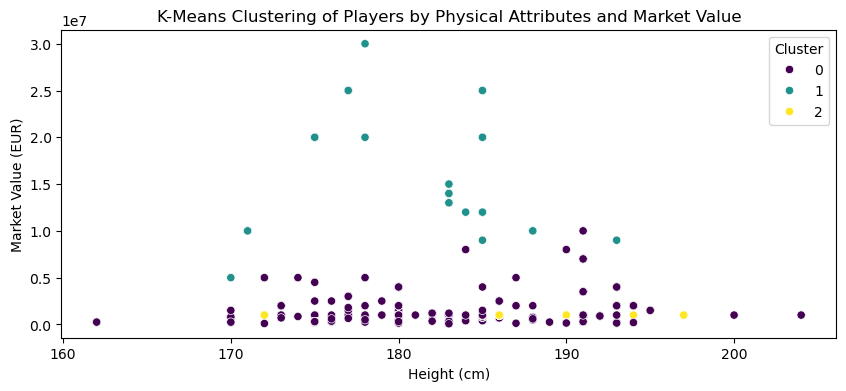

In [12]:
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x=features['height_in_cm'], 
    y=features['market_value_in_eur'], 
    hue=features['Cluster'], 
    palette='viridis'
)
plt.title("K-Means Clustering of Players by Physical Attributes and Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (EUR)")
plt.show()

### Interpretation:
- Players are grouped into clusters based on their height, market value, and age.
- These clusters can help identify player archetypes (e.g., tall and high-value, young and developing).

# B) Contract Management: Descriptive Analysis
## What is the average contract duration (in years) for players grouped by position?

In [15]:
# Calculate contract duration
data['contract_duration'] = pd.to_datetime(data['contract_expiration_date']).dt.year - pd.to_datetime('today').year

# Group by position
contract_summary = data.groupby('position_x')['contract_duration'].mean().reset_index()

# Display results
print(contract_summary)

            position_x  contract_duration
0   Attacking Midfield           0.416667
1     Central Midfield           0.473684
2          Centre-Back          -0.508259
3       Centre-Forward          -0.366667
4   Defensive Midfield          -0.428571
5           Goalkeeper          -1.000000
6          Left Winger          -0.750000
7            Left-Back          -1.000000
8       Right Midfield           1.500000
9         Right Winger           1.424242
10          Right-Back          -0.454545


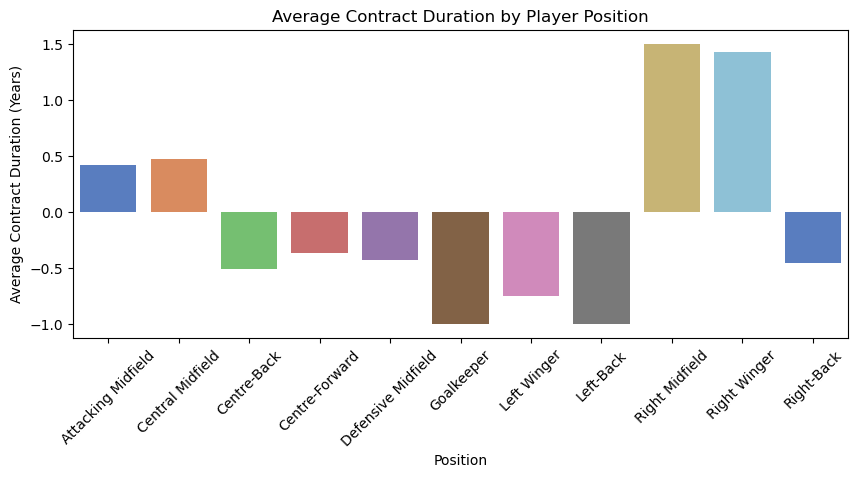

In [16]:
plt.figure(figsize=(10, 4))
sns.barplot(data=contract_summary, x='position_x', y='contract_duration', palette='muted')
plt.title("Average Contract Duration by Player Position")
plt.xlabel("Position")
plt.ylabel("Average Contract Duration (Years)")
plt.xticks(rotation=45)
plt.show()

### Interpretation:
- Analyzing the average contract duration by position helps clubs understand trends in contractual commitments for various roles.